In [1]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from numpy import random
from pathlib import Path
import gc
pd.set_option('display.max_columns',100)

## 加载数据
### (1) train test

train.csv包含11376681条数据，15个字段：id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts 

- id：代表数据集的第几条数据，从1到11376681。 
- target：代表该视频是否被用户点击了，1代表点击，0代表未点击。
- timestamp：代表改用户点击改视频的时间戳，如果未点击则为NULL。 
- deviceid：用户的设备id。 
- newsid：视频的id。 
- guid：用户的注册id。 
- pos：视频推荐位置。 
- app_version：app版本。 
- device_vendor：设备厂商。 
- netmodel：网络类型。 
- osversion：操作系统版本。 
- lng：经度。 
- lat：维度。 
- device_version：设备版本。 
- ts：视频暴光给用户的时间戳。



test.csv包含3653592条数据，13个字段：

id,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts 
- id：代表数据集的第几条数据，从test_1到test_3653592。 
- deviceid：用户的设备id。 
- newsid：视频的id。 
- guid：用户的注册id。 
- pos：视频推荐位置。 
- app_version：app版本。 
- device_vendor：设备厂商。 
- netmodel：网络类型。 
- osversion：操作系统版本。 
- lng：经度。 
- lat：维度。 
- device_version：设备版本。 
- ts：视频暴光给用户的时间戳。



In [2]:
root = Path('./data/')
train_df = pd.read_feather(root / 'train.feather')
train_df['target'] = train_df['target'].astype(int)
test_df = pd.read_feather(root / 'test.feather')

In [3]:
print('train_df.shape',train_df.shape)
print('test_df.shape',test_df.shape)

train_df.shape (11376681, 15)
test_df.shape (3653592, 13)


In [4]:
train_df.head(10)

,id,target,timestamp,deviceid,newsid,guid,pos,app_version,device_vendor,netmodel,osversion,lng,lat,device_version,ts
0,1,0,NaN,8b2d7f2aed47ab32e9c6ae4f5ae00147,8008333091915950969,9a2c909ebc47aec49d9c160cdb4a6572,1,2.1.5,HONOR,g4,9,112.538521,37.837925,STF-AL00,2019-11-09 11:14:46
1,2,0,NaN,8b2d7f2aed47ab32e9c6ae4f5ae00147,8008333091915950969,9a2c909ebc47aec49d9c160cdb4a6572,1,2.1.5,HONOR,w,9,111.731186,35.622742,STF-AL00,2019-11-09 11:14:47
2,3,0,NaN,832aaa33cdf4a0938ba2c795eb3ffefd,4941885624885390992,d51a157d2b1e0e9aed4dd7f9900b85b2,2,1.9.9,vivo,w,8.1.0,0.000000,0.000000,V1818T,2019-11-10 09:11:15
3,4,0,NaN,832aaa33cdf4a0938ba2c795eb3ffefd,6088376349846612406,d51a157d2b1e0e9aed4dd7f9900b85b2,1,1.9.9,vivo,w,8.1.0,0.000000,0.000000,V1818T,2019-11-10 09:10:44
4,5,0,NaN,67dd9dac18cce1a6d79e8f20eefd98ab,5343094189765291622,625dc45744f59ddbc3ec8df161217188,0,2.1.1,xiaomi,w,9,116.750877,36.568310,Redmi Note 7,2019-11-10 10:16:29
5,6,0,NaN,04813dbae7d339a61f38d648e77b2c28,3734327341629052372,3bc11f585ac7b18d7997fa83e19aa439,1,2.1.5,OPPO,o,8.1.0,0.000000,0.000000,PBAM00,2019-11-09 06:21:07
6,7,0,NaN,04813dbae7d339a61f38d648e77b2c28,5518070787661276860,3bc11f585ac7b18d7997fa83e19aa439,2,2.1.5,OPPO,o,8.1.0,0.000000,0.000000,PBAM00,2019-11-09 06:20:58
7,8,0,NaN,04813dbae7d339a61f38d648e77b2c28,6167225445325229993,NaN,0,2.1.5,OPPO,w,8.1.0,0.000000,0.000000,PBAM00,2019-11-09 06:17:02
8,9,0,NaN,04813dbae7d339a61f38d648e77b2c28,8963857601701307537,3bc11f585ac7b18d7997fa83e19aa439,2,2.1.5,OPPO,o,8.1.0,0.000000,0.000000,PBAM00,2019-11-09 06:21:14
9,10,0,NaN,9a887c7be5401571603f912eb3ba172f,1068538578400892892,b04dfb77636b0e593f54b08d9eda0c5f,1,2.1.5,HUAWEI,o,9,0.000000,0.000000,FLA-AL20,2019-11-09 15:06:01


In [5]:
len(train_df.groupby(by='deviceid'))==len(train_df.groupby(by='guid')) # 判断一个设备是否只对应一个用户

False

In [6]:
# len(train_df.groupby(by=['deviceid','newsid']))==len(train_df) # 判断一个设备是否只观看一次相同的视频
# False

关系：一个用户可能只有一个设备，一个用户可能有多个设备

guid 存在空：设备没有登录或者用户没有注册等

一个设备可能在不同时间多次观看同一个视频

那么相当于任务是将视频能够在合适的时间推荐给合适的用户，构建特征需要多从设备和视频，用户构建特征。

In [7]:
def statics(data):
    stats = []
    for col in data.columns:
        stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0],
                      data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values',
                                            'Percentage of values in the biggest category', 'type'])
    stats_df.sort_values('Unique_values', ascending=False, inplace=True)
    return stats_df

In [8]:
train_stats_df=statics(train_df)
train_stats_df

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,id,11376681,0.000000,0.000009,int32
4,newsid,1152851,0.000000,0.190161,int64
12,lat,324019,0.000000,16.601344,float32
11,lng,288843,0.000000,16.601327,float32
14,ts,259138,0.000000,0.001846,datetime64[ns]
3,deviceid,104736,0.000000,0.905176,category
5,guid,104332,1.454449,1.454449,category
13,device_version,2074,0.000000,2.965127,category
2,timestamp,1979,89.346471,89.346471,float32
8,device_vendor,275,0.000000,28.271418,category


In [9]:
test_stats_df=statics(test_df)
test_stats_df

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,id,3653592,0.000000,0.000027,category
2,newsid,626908,0.000000,0.351928,int64
10,lat,138312,0.000000,14.931498,float32
9,lng,129625,0.000000,14.931498,float32
12,ts,86380,0.000000,0.003941,datetime64[ns]
3,guid,56860,0.827952,0.827952,category
1,deviceid,56681,0.000000,0.392737,category
11,device_version,1574,0.000000,2.954709,category
6,device_vendor,182,0.000000,26.701504,category
5,app_version,30,0.000000,70.366943,category


### target 分析

In [10]:
train_df['target'].value_counts()

0    10164663
1     1212018
Name: target, dtype: int64

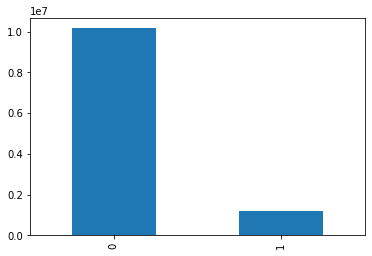

In [11]:
train_df['target'].value_counts().plot(kind='bar')
plt.show()

In [12]:
(train_df['target']==1).astype(int).sum()/(train_df['target']==0).astype(int).sum()

0.11923838498138109

In [13]:
# import plotly.express as px

# train_df['date'] = train_df['ts'].dt.date
# fig = px.scatter(train_df, x='date', y='target')
# fig.show()

### (2) app 

app.csv包含114584条数据，2个字段：deviceid，applist 
- deviceid：用户设备id。 
- applist：用户所拥有的app，我们已将app的名字设置成了app_1,app_2..的形式。



In [14]:
app_df = pd.read_feather(root / 'app.feather')
print('app_df.shape',app_df.shape)

app_df.shape (161417, 2)


In [15]:
app_df.head()

,deviceid,applist
0,832aaa33cdf4a0938ba2c795eb3ffefd,[app_1 app_2 app_3 app_4 app_5 app_6 app_7 app...
1,67dd9dac18cce1a6d79e8f20eefd98ab,[app_84 app_85 app_4 app_5 app_86 app_87 app_8...
2,ddaa88b573f0ec579486de4df7852871,[app_133 ]
3,132cc4746b2ca645b37d64717bf2ccbd,[app_133 ]
4,19ffd9b567a0a0863a72aee342d2ce9d,[app_1 app_2 app_3 app_4 app_5 app_6 app_7 app...


In [16]:
app_stats_df=statics(app_df)
app_stats_df

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,deviceid,114584,0.0,0.001239,category
1,applist,33036,0.0,51.164375,category


### (3) user 表

user.csv包含128573条数据，9个字段：deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender 

- deviceid：用户设备id。
- guid：用户注册id。 
- outertag：用户画像用|分隔，冒号后面的数字代表对该标签的符合程度，分数越高代表该标签越符合该用户。 
- tag：同outertag。 
- level：用户等级。 
- personidentification：1表示劣质用户 0表示正常用户。 
- followscore：徒弟分（好友分）。 
- personalscore：个人分。 
- gender：性别。



In [17]:
user_df = pd.read_feather(root / 'user.feather')
print('user_df.shape',user_df.shape)

user_df.shape (128573, 9)


In [18]:
user_df.head()

,deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender
0,dd4f4cbcc9733f8de667a99b7f375b99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e9b1196a3fc0603c55614caf35c26ce5,NaN,NaN,天文_cs:7.456377740584219|地球_cs:6.98583086684807...,NaN,NaN,NaN,NaN,NaN
2,db10a6fa198cb4d0aa7121642b8370b9,NaN,穿秀_cs:1.2165785692152642|社会热点_cs:0.40078686267...,一起来看流星雨_cs:6.040606247799313|都市_cs:4.602140126...,NaN,NaN,NaN,NaN,NaN
3,c52c040529eafef29b60c7b2b28cdf6f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bb08d2ff7f124e7fd6d00fd1a1a3eb36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
user_stats_df=statics(user_df)
user_stats_df

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,deviceid,114584,0.000000,0.010889,category
1,guid,84265,34.319025,34.319025,category
3,tag,56746,50.877711,50.877711,category
2,outertag,14424,76.458510,76.458510,category
6,followscore,170,37.369432,59.213832,float32
7,personalscore,64,35.714341,35.714341,float32
4,level,14,35.714341,63.665000,float32
8,gender,3,56.787195,56.787195,float32
5,personidentification,2,38.055424,61.722912,float32


In [123]:
# # 将category类型转为str
# cate_cols=['deviceid','guid','app_version','device_vendor','netmodel','osversion','device_version']
# train_df [cate_cols]= train_df[cate_cols].applymap(str)
# test_df [cate_cols]= test_df[cate_cols].applymap(str)



In [124]:
# cates=['deviceid','guid','outertag','tag']
# user_df.dtypes

In [125]:
# app_df.dtypes

## 特征工程

In [126]:
# train_df=pd.merge(train_df,app_df,on='deviceid',how='left') # id对应多个device记录
# train_df=pd.merge(train_df,user_df,on='deviceid',how='left')

In [127]:
# test_df=pd.merge(test_df,app_df,on='deviceid',how='left') # id对应多个device记录
# test_df=pd.merge(test_df,user_df,on='deviceid',how='left')

### (1) device的app统计特征

In [263]:
app_grouped_df=pd.DataFrame({'deviceid':app_df['deviceid'].astype(str).unique()})

In [264]:
print(app_df['applist'][0].replace('[','').replace(']','').split(' '))

['app_1', 'app_2', 'app_3', 'app_4', 'app_5', 'app_6', 'app_7', 'app_8', 'app_9', 'app_10', 'app_11', 'app_12', 'app_13', 'app_14', 'app_15', 'app_16', 'app_17', 'app_18', 'app_19', 'app_20', 'app_21', 'app_22', 'app_23', 'app_24', 'app_25', 'app_26', 'app_27', 'app_28', 'app_29', 'app_30', 'app_31', 'app_32', 'app_33', 'app_34', 'app_35', 'app_36', 'app_37', 'app_38', 'app_39', 'app_40', 'app_41', 'app_42', 'app_43', 'app_44', 'app_45', 'app_46', 'app_47', 'app_48', 'app_49', 'app_50', 'app_51', 'app_52', 'app_53', 'app_54', 'app_55', 'app_56', 'app_57', 'app_58', 'app_59', 'app_60', 'app_61', 'app_62', 'app_63', 'app_64', 'app_65', 'app_66', 'app_67', 'app_68', 'app_69', 'app_70', 'app_71', 'app_72', 'app_73', 'app_74', 'app_75', 'app_76', 'app_77', 'app_78', 'app_79', 'app_80', 'app_81', 'app_82', 'app_83', '']


In [265]:
# 统计一个设备的出现过的app总数
app_df['app_nums']=app_df['applist'].apply(lambda x:len(x.replace('[','').replace(']','').split(' ')))
app_df.app_nums.head()

grouped_df=app_df.groupby(by='deviceid').agg({'app_nums': ['sum']})
grouped_df.columns = ['app_nums_sum']
grouped_df = grouped_df.reset_index()
app_grouped_df = pd.merge(app_grouped_df, grouped_df, on='deviceid', how='left')

In [266]:
# 统计一个设备的出现过的不同app总数 unique


In [267]:
# 统计一个设备的applist个数
grouped_df=app_df.groupby(by='deviceid').agg({'applist': ['count']})
grouped_df.columns = ['applist_count']
grouped_df = grouped_df.reset_index()
app_grouped_df = pd.merge(app_grouped_df, grouped_df, on='deviceid', how='left')

In [268]:
# 统计一个设备上applist对应的不同device个数总数
app_df['applist_count'] = app_df.groupby('applist')['deviceid'].transform('count')
grouped_df=app_df.groupby(by='deviceid').agg({'applist_count': ['sum']})
grouped_df.columns = ['applist_count_sum']
grouped_df = grouped_df.reset_index()
app_grouped_df = pd.merge(app_grouped_df, grouped_df, on='deviceid', how='left')

In [269]:
app_grouped_df.head()

,deviceid,app_nums_sum,applist_count,applist_count_sum
0,832aaa33cdf4a0938ba2c795eb3ffefd,84,1,1
1,67dd9dac18cce1a6d79e8f20eefd98ab,64,2,45658
2,ddaa88b573f0ec579486de4df7852871,4,2,128245
3,132cc4746b2ca645b37d64717bf2ccbd,4,2,128245
4,19ffd9b567a0a0863a72aee342d2ce9d,134,2,2


### (2) device特征的user统计

In [270]:
user_grouped_df=pd.DataFrame({'deviceid':user_df['deviceid'].astype(str).unique()})

In [271]:
user_df.head()

,deviceid,guid,outertag,tag,level,personidentification,followscore,personalscore,gender,outertag_nums,outertag_score,tag_nums,tag_score
0,dd4f4cbcc9733f8de667a99b7f375b99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00000,0,0.000000
1,e9b1196a3fc0603c55614caf35c26ce5,NaN,NaN,天文_cs:7.456377740584219|地球_cs:6.98583086684807...,NaN,NaN,NaN,NaN,NaN,0,0.00000,10,35.966368
2,db10a6fa198cb4d0aa7121642b8370b9,NaN,穿秀_cs:1.2165785692152642|社会热点_cs:0.40078686267...,一起来看流星雨_cs:6.040606247799313|都市_cs:4.602140126...,NaN,NaN,NaN,NaN,NaN,3,2.27376,101,129.576607
3,c52c040529eafef29b60c7b2b28cdf6f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00000,0,0.000000
4,bb08d2ff7f124e7fd6d00fd1a1a3eb36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00000,0,0.000000


In [272]:
# 统计一个设备的注册不同用户个数
grouped_df=user_df.groupby(by='deviceid').agg({'guid': ['nunique']})
grouped_df.columns = ['deviceid_unique_guid']
grouped_df = grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')
# user_df['deviceid_nunique_guid'] = user_df.groupby('deviceid').guid.transform('nunique')

In [273]:
# 一个设备的outertag 的统计
def get_outertag_nums(x):
    """
    获取一个outertag的tag个数
    """
    if x=='nan':
        return 0
    return len(x.split('|'))-1
def get_outertag_score(x):
    """
    获取一个outertag的tag分数和
    """
    tags=x.split('|')
    
    score=0
    if len(tags)==1 and tags[0]=='nan':
        return score
    else:
        for tag in tags:
            if len(tag.split(':'))==2:
                score+=float(tag.split(':')[1])
            else:
                score+=0
    return score
user_df['outertag_nums']=user_df['outertag'].astype('str').apply(lambda x:get_outertag_nums(x))
user_df['outertag_score']=user_df['outertag'].astype('str').apply(lambda x:get_outertag_score(x))

user_df['tag_nums']=user_df['tag'].astype('str').apply(lambda x:get_outertag_nums(x))
user_df['tag_score']=user_df['tag'].astype('str').apply(lambda x:get_outertag_score(x))

grouped_df=user_df.groupby(by='deviceid').agg({'outertag_nums': ['sum','median','mean']})
grouped_df.columns=['deviceid_' + '_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')

grouped_df=user_df.groupby(by='deviceid').agg({'outertag_score': ['sum','median','mean']})
grouped_df.columns=['deviceid_' + '_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')


grouped_df=user_df.groupby(by='deviceid').agg({'tag_nums': ['sum','median','mean']})
grouped_df.columns=['deviceid_' + '_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')

grouped_df=user_df.groupby(by='deviceid').agg({'tag_score': ['sum','median','mean']})
grouped_df.columns=['deviceid_' + '_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')


,deviceid,deviceid_unique_guid,deviceid_outertag_nums_sum,deviceid_outertag_nums_median,deviceid_outertag_nums_mean,deviceid_outertag_score_sum,deviceid_outertag_score_median,deviceid_outertag_score_mean,deviceid_tag_nums_sum,deviceid_tag_nums_median,deviceid_tag_nums_mean,deviceid_tag_score_sum,deviceid_tag_score_median,deviceid_tag_score_mean
0,dd4f4cbcc9733f8de667a99b7f375b99,0,0,0.0,0.0,0.00000,0.00000,0.00000,0,0.0,0.0,0.000000,0.000000,0.000000
1,e9b1196a3fc0603c55614caf35c26ce5,0,0,0.0,0.0,0.00000,0.00000,0.00000,10,10.0,10.0,35.966368,35.966368,35.966368
2,db10a6fa198cb4d0aa7121642b8370b9,0,3,3.0,3.0,2.27376,2.27376,2.27376,101,101.0,101.0,129.576607,129.576607,129.576607
3,c52c040529eafef29b60c7b2b28cdf6f,0,0,0.0,0.0,0.00000,0.00000,0.00000,0,0.0,0.0,0.000000,0.000000,0.000000
4,bb08d2ff7f124e7fd6d00fd1a1a3eb36,0,0,0.0,0.0,0.00000,0.00000,0.00000,0,0.0,0.0,0.000000,0.000000,0.000000


In [274]:
# 设备的用户等级统计
grouped_df=user_df.groupby(by='deviceid').agg({'level': ['sum']})
grouped_df.columns=['deviceid_level_sum']
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')


In [275]:
# 设备的用户劣质统计
# 1表示劣质用户 0表示正常用户。
grouped_df=user_df.groupby(by='deviceid').agg({'personidentification': ['sum']})
grouped_df.columns=['deviceid_personidentification_sum']
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')

grouped_df=user_df.groupby(by='deviceid').agg({'personalscore': ['sum']})
grouped_df.columns=['deviceid_personalscore_sum']
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')

grouped_df=user_df.groupby(by='deviceid').agg({'followscore': ['sum']})
grouped_df.columns=['deviceid_followscore_sum']
grouped_df.reset_index()
user_grouped_df = pd.merge(user_grouped_df, grouped_df, on='deviceid', how='left')

In [276]:
user_grouped_df.head()

,deviceid,deviceid_unique_guid,deviceid_outertag_nums_sum,deviceid_outertag_nums_median,deviceid_outertag_nums_mean,deviceid_outertag_score_sum,deviceid_outertag_score_median,deviceid_outertag_score_mean,deviceid_tag_nums_sum,deviceid_tag_nums_median,deviceid_tag_nums_mean,deviceid_tag_score_sum,deviceid_tag_score_median,deviceid_tag_score_mean,deviceid_level_sum,deviceid_personidentification_sum,deviceid_personalscore_sum,deviceid_followscore_sum
0,dd4f4cbcc9733f8de667a99b7f375b99,0,0,0.0,0.0,0.00000,0.00000,0.00000,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,e9b1196a3fc0603c55614caf35c26ce5,0,0,0.0,0.0,0.00000,0.00000,0.00000,10,10.0,10.0,35.966368,35.966368,35.966368,0.0,0.0,0.0,0.0
2,db10a6fa198cb4d0aa7121642b8370b9,0,3,3.0,3.0,2.27376,2.27376,2.27376,101,101.0,101.0,129.576607,129.576607,129.576607,0.0,0.0,0.0,0.0
3,c52c040529eafef29b60c7b2b28cdf6f,0,0,0.0,0.0,0.00000,0.00000,0.00000,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,bb08d2ff7f124e7fd6d00fd1a1a3eb36,0,0,0.0,0.0,0.00000,0.00000,0.00000,0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


### (3) 视频的统计特征

根据newsid 统计出一个视频的受欢迎程度，或者热门程度

In [43]:
df = pd.concat([train_df, test_df], sort=False, axis=0)
df.shape

(15030273, 15)

In [44]:
df_stats=statics(df)
df_stats

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,id,15030273,0.000000,0.000007,object
4,newsid,1319604,0.000000,0.148507,int64
12,lat,400619,0.000000,16.195434,float32
11,lng,350640,0.000000,16.195421,float32
14,ts,345517,0.000000,0.001397,datetime64[ns]
3,deviceid,114584,0.000000,0.719475,object
5,guid,114539,1.302159,1.302159,object
13,device_version,2143,0.000000,2.962594,object
2,timestamp,1979,91.936154,91.936154,float32
8,device_vendor,289,0.000000,27.889799,object


In [45]:
"{}%".format(len(df['newsid'].unique())*100/df.shape[0] )

'8.779640928677743%'

In [ ]:
# 视频出现次数
df['news_count'] = df.groupby('newsid')['id'].transform('count') #
# 视频推荐的人数
df['news_guid_unique']=df.groupby(by='newsid')['guid'].transform('nunique') # 人数

df['news_deviceid_unique']=df.groupby(by='newsid')['deviceid'].transform('nunique') # 设备
df['news_pos_unique']=df.groupby(by='newsid')['pos'].transform('nunique')
df['news_app_version_unique']=df.groupby(by='newsid')['app_version'].transform('nunique')
df['news_device_vendor_unique']=df.groupby(by='newsid')['device_vendor'].transform('nunique') 
df['news_netmodel_unique']=df.groupby(by='newsid')['netmodel'].transform('nunique')
df['news_osversion_unique']=df.groupby(by='newsid')['osversion'].transform('nunique')
df['news_device_version_unique']=df.groupby(by='newsid')['device_version'].transform('nunique')

df['news_lng_unique']=df.groupby(by='newsid')['lng'].transform('nunique') # 地理
df['news_lat_unique']=df.groupby(by='newsid')['lat'].transform('nunique')
